In [ ]:
# Examen tercer parcial 
# Andrea Mercado Jiménez

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import networkx as nx
import scipy.io
from matplotlib import cm 
from scipy.io import loadmat

In [32]:
# Ejercicio 4: Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2, con el nuevo arreglo muestre los nodos y vértices del grafo

file_path = r"C:\\Users\\andim\\OneDrive\\Escritorio\\Quinto Semestre\\Modelos Computacionales\\Coactivation_matrix.mat"
mat_data = loadmat(file_path)

In [33]:
mat_dict = {k: v for k, v in mat_data.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict['Coactivation_matrix'])

mat_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [35]:
binary_matadj = (mat_dict['Coactivation_matrix'] > 0.2).astype(int)
binary_matadj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
df_filtered = pd.DataFrame(binary_matadj)
df_filtered

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)
G_filtered = nx.from_pandas_adjacency(df_filtered, create_using=nx.DiGraph)

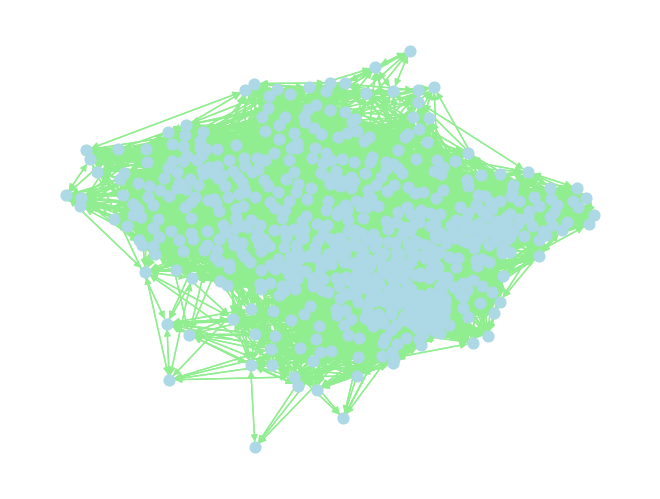

In [47]:
nx.draw(G, node_color='lightblue', edge_color='lightgreen', node_size=60)

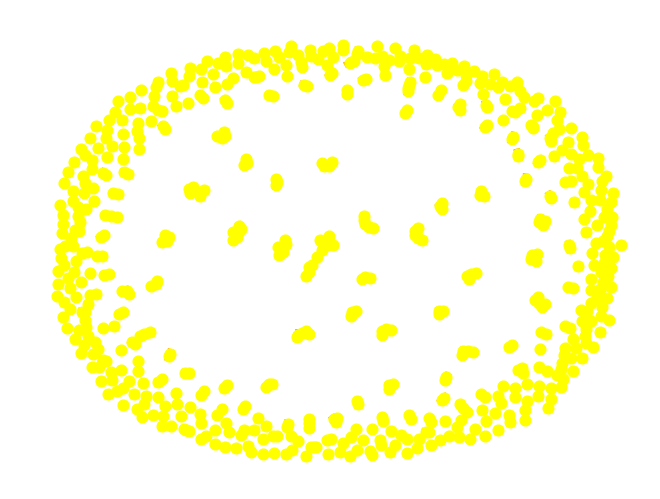

In [39]:
nx.draw(G_filtered, node_color='yellow', edge_color='orange', node_size=60)

In [40]:
len(G.edges)

37250

In [41]:
len(G_filtered.edges)

372

In [42]:
G_filtered.edges(data=True)

OutEdgeDataView([(2, 3, {'weight': 1}), (3, 2, {'weight': 1}), (5, 12, {'weight': 1}), (7, 154, {'weight': 1}), (8, 11, {'weight': 1}), (9, 23, {'weight': 1}), (11, 8, {'weight': 1}), (12, 5, {'weight': 1}), (16, 19, {'weight': 1}), (19, 16, {'weight': 1}), (23, 9, {'weight': 1}), (25, 428, {'weight': 1}), (27, 290, {'weight': 1}), (35, 304, {'weight': 1}), (38, 70, {'weight': 1}), (38, 400, {'weight': 1}), (41, 78, {'weight': 1}), (42, 45, {'weight': 1}), (42, 416, {'weight': 1}), (43, 46, {'weight': 1}), (45, 42, {'weight': 1}), (46, 43, {'weight': 1}), (49, 53, {'weight': 1}), (53, 49, {'weight': 1}), (54, 217, {'weight': 1}), (62, 69, {'weight': 1}), (62, 97, {'weight': 1}), (63, 69, {'weight': 1}), (66, 71, {'weight': 1}), (69, 62, {'weight': 1}), (69, 63, {'weight': 1}), (70, 38, {'weight': 1}), (71, 66, {'weight': 1}), (73, 124, {'weight': 1}), (78, 41, {'weight': 1}), (81, 636, {'weight': 1}), (83, 86, {'weight': 1}), (86, 83, {'weight': 1}), (89, 94, {'weight': 1}), (92, 105, 

In [48]:
x = mat_dict['Coord'][:, 0] 
y = mat_dict['Coord'][:, 1] 
z = mat_dict['Coord'][:, 2]  

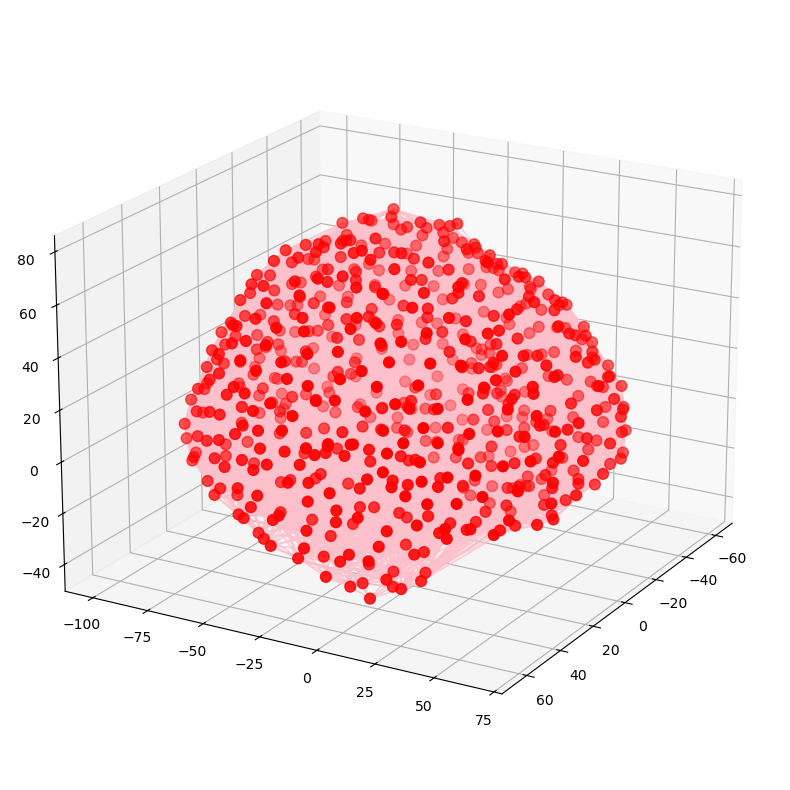

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(x, y, z, color='red', s=60)


for edge in G.edges(data=True):  
    i, j = edge[0], edge[1]  
    weight = edge[2].get('weight', 0)  

    if weight > 0:  
        ax.plot(
            [x[i], x[j]], 
            [y[i], y[j]],  
            [z[i], z[j]],  
            color='pink', alpha=0.5 + 0.5 * weight, lw=1 + 2 * weight  
        )


ax.view_init(elev=20., azim=30)

plt.show()

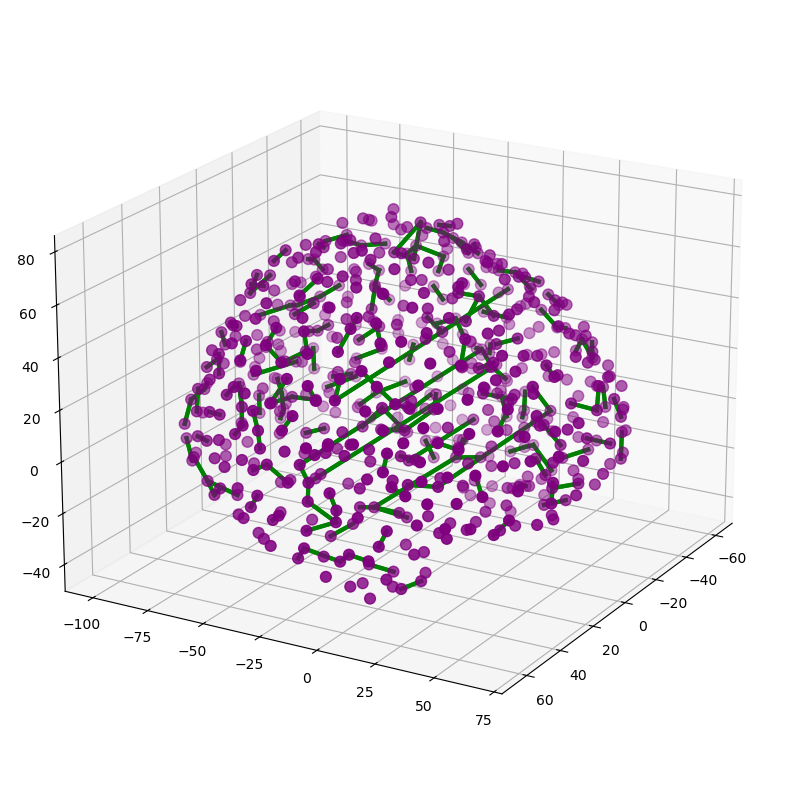

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(x, y, z, color='purple', s=60)


for edge in G_filtered.edges(data=True):  
    i, j = edge[0], edge[1]  
    weight = edge[2].get('weight', 0)  

    if weight > 0:  
        ax.plot(
            [x[i], x[j]], 
            [y[i], y[j]],  
            [z[i], z[j]],  
            color='green', alpha=0.5 + 0.5 * weight, lw=1 + 2 * weight  
        )


ax.view_init(elev=20., azim=30)

plt.show()